## La méthode des éléments finis de degré plus élevés
On considère le problème suivant. Trouver $u:[0,1] \rightarrow \mathbb{R}$ solution du problème aux limites
$$
- \epsilon u'' + u'=2\ \ dans\ ]0,1[
$$
et vérifiant les conditions aux limites
$$
u(0)=1,\ u(1)=2
$$
où $\epsilon > 0$ sont des nombres réels.

------

**Exercice 1** On part d'un maillage(uniforme) de sommets
$$
0 = x_0 < x_1 <...< x_m < x_{m+1} = 1,\ \ m \in \mathbb{N}^*.
$$
Nous noterons
$$
T_i=]x_i,x_{i+1}[
$$
l'élément $i$ et 
$$
h=\frac{1}{m+1}
$$
la taille de l'élément.  

(a) Écrire une formulation variationnelle du problème (1)-(2) utilisant des éléments finis $P_2$.  

(b) On note $U^h$ le vecteur dont les composantes sont les inconnues, i.e. les valeurs de $U^h$, approximations des $u(x)$ aux sommets et aux points internes de l'élément. Montrer que $U^h$ est solution d'un système linéaire
$$
A^h U^h = F^h
$$
dont on précisera la matrice $A^h \in \mathbb{R}^{(2m-1)\times(2m-1)}$ et le second membre $F^h \in \mathbb{R}^{2m-1}$.  

(c) Pour $\epsilon = 0.1$, représenter graphiquement (pour différentes valeurs de m) la solution obtenue en résolvant le système. Représenter sur le même graphique la solution exacte.

------

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
from scipy import stats

In [2]:
eps=0.1                         ## valeur constante donnée
L=1                             ## la longueur d'intervalle totale
alpha = 1                       ## condition au bord pour u(0)=1
beta = 2                        ## condition au bord pour u(1)=2
M=[20,40,60,80,100]             ## la liste pour la stockage des valeurs de M

In [3]:
## la solution exacte

def u(x, eps):
    c_2 = 1/(1-np.exp(1/eps))
    c = 1 - c_2
    return 2*x + c + c_2 * np.exp(x/eps)

def u_prime(x,eps):
    c_2 = 1/(1-np.exp(1/eps))
    c = 1 - c_2
    return 2 + c_2*np.exp(x/eps)/eps

In [4]:
# définir les fonctions des bases locales dans T_i (utilisé pour dessiner la grille)

def w_i_1(x, h, x_i):
    up = (h-2*(x-x_i))*(h-(x-x_i))
    down = h**2
    return up/down

def w_i_2(x, h, x_i):
    up = 4*(h-(x-x_i))*(x-x_i)
    down = h**2
    return up/down

def w_i_3(x, h, x_i):
    up = -(h-2*(x-x_i))*(x-x_i)
    down = h**2
    return up/down

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

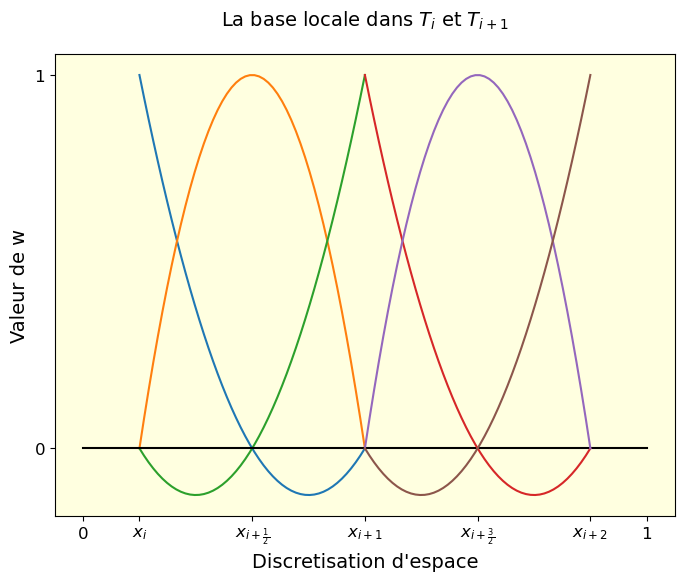

In [5]:
#### Dessiner une grille pour préciser la base locale
plt.figure(0)

fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi = 100)
ax.set_title("La base locale dans $T_i$ et $T_{i+1}$", fontsize = 14, pad=20)
ax.set_xlabel("Discretisation d'espace", fontsize=14)
ax.set_ylabel("Valeur de w", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor('lightyellow')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.grid(False)


X_1 = np.linspace(0.1, 0.5, 50)
X_2 = np.linspace(0.5, 0.9, 50)
Y = np.zeros(100)
Y_1 = np.linspace(0, 1, 100)

#### les bases locales dans T_i
W_i_1 = []
W_i_2 = []
W_i_3 = []

#### les bases locales dans T_(i+1)
W_j_1 = []
W_j_2 = []
W_j_3 = []

for x in X_1:
    W_i_1.append(w_i_1(x, 0.4, 0.1))
    W_i_2.append(w_i_2(x, 0.4, 0.1))
    W_i_3.append(w_i_3(x, 0.4, 0.1))

for x in X_2:
    W_j_1.append(w_i_1(x, 0.4, 0.5))
    W_j_2.append(w_i_2(x, 0.4, 0.5))
    W_j_3.append(w_i_3(x, 0.4, 0.5))

ax.set_xticks([0, 0.1, 0.3, 0.5, 0.7, 0.9, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels([r"0", r"$x_{i}$", r"$x_{i+\frac{1}{2}}$", r"$x_{i+1}$",
                    r"$x_{i+\frac{3}{2}}$", r"$x_{i+2}$", r"1"])


plt.plot(X_1, W_i_1, label = "$w_i$ dans $T_i$")
plt.plot(X_1, W_i_2)
plt.plot(X_1, W_i_3)
plt.plot(Y_1, Y, color = 'black')
plt.plot(X_2, W_j_1)
plt.plot(X_2, W_j_2)
plt.plot(X_2, W_j_3)
plt.legend
plt.show

In [6]:
def g(x):
    return alpha *(1-x) +beta * x

In [7]:
## pour calculer les matrice locale dans T_i
def locale(m, eps):
    h = L/(m+1)
    A1 = np.array([[7,-8,1],[-8,16,-8],[1,-8,7]])/3
    A2 = np.array([[-3,4,-1],[-4,0,4],[1,-4,3]])/6
    F = np.array([1,4,1])/6
    g = np.array([-1,0,1])

    Ah_Ti = A1*eps/h + A2
    Fh_Ti = 2*h*F -(g + F*h)*(beta-alpha)

    
    return Ah_Ti, Fh_Ti

In [8]:
def globale_numérique(m, eps):
    
    h = L/(m + 1)
    
    Ah = np.zeros((2*m+3,2*m+3)).reshape(2*m+3,2*m+3)
    Fh = np.zeros(2*m+3)
    for i in np.arange(0,m+1):
        Ah_Ti, Fh_Ti = locale(m, eps)
        Ah[2*i:2*i+3,2*i:2*i+3] += Ah_Ti
        
        Fh[2*i:2*i+3] += Fh_Ti
        
    Uh_pr = np.zeros(2*m+3)
    Uh_pr[1:2*m+2]= np.linalg.solve(Ah[1:2*m+2,1:2*m+2],Fh[1:2*m+2])
    
    return Uh_pr


In [52]:
def image(L,m,eps):
    
    X=np.linspace(0,L,2*m+3)  
    
    fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi = 100)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_facecolor('lightyellow')
    
    u_numerique = globale_numérique(m,eps) + g(X)
    u_exacte = u(X,eps)

    plt.plot(X,u_exacte,label = "solution exacte", linewidth=3)
    plt.plot(X,u_numerique,"--",label="solution numérique", linewidth=3)
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title("méthode des éléments finis $P_2$ avec nombre d'intervalle "+str(m+1))
    plt.legend()
    plt.show()

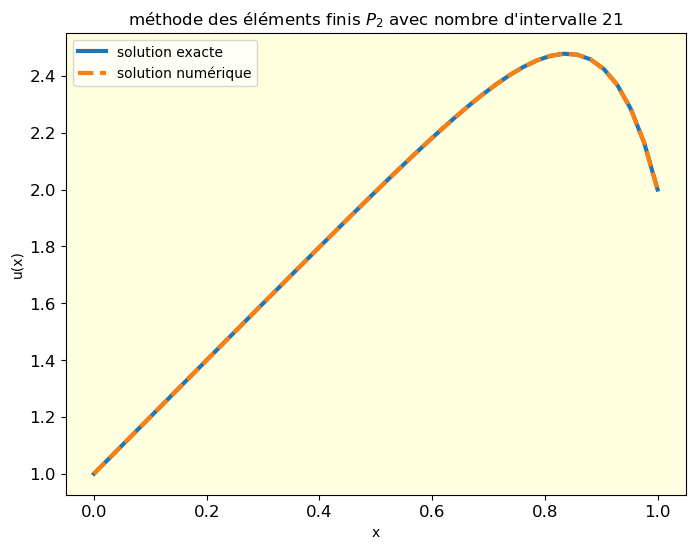

In [53]:
image(1, 20, 0.1)

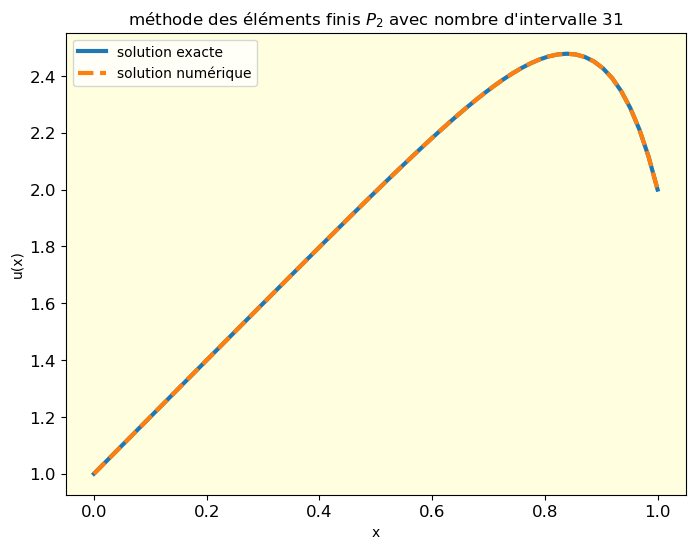

In [54]:
image(1, 30, 0.1)

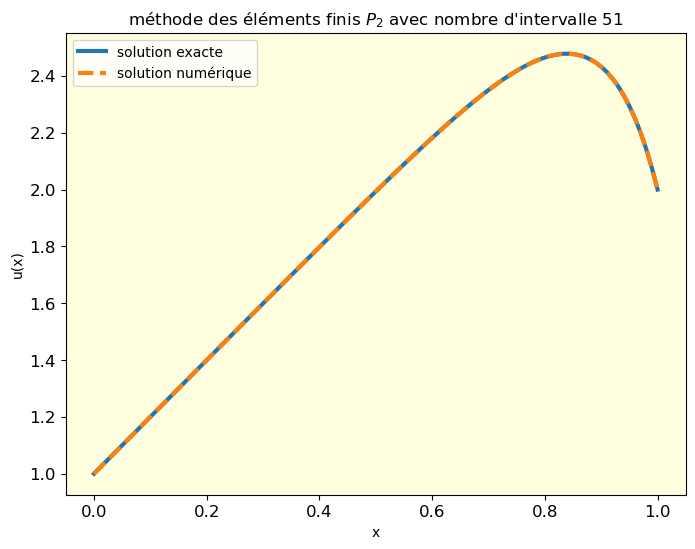

In [55]:
image(1, 50, 0.1)

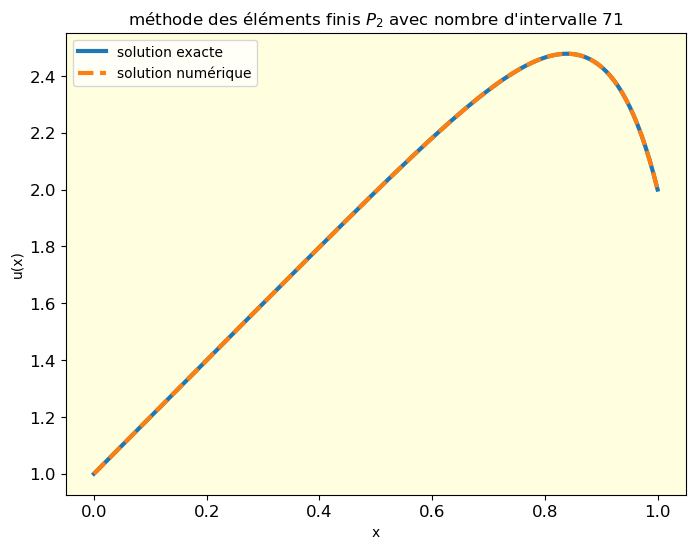

In [56]:
image(1, 70, 0.1)

In [14]:
## donner les bases dans T_i
def base_wi(x, h, i):
    return (h - 2*(x-i*h)) * (h - (x - i*h))/h**2

def base_wi_demi(x, h, i):
    return 4*(h - (x-i*h)) * (x - i*h) / h**2

def base_wi_1(x, h, i):
    return -(h - 2 * (x-i*h)) * (x - i*h) / h**2

In [15]:
def erreur(x,xi,xi_1,ui,ui_demi,ui_1):
    h = xi_1 - xi
    i = xi/h
    return(u(x,eps)-(ui*base_wi(x,h,i) + ui_demi*base_wi_demi(x,h,i) + ui_1*base_wi_1(x,h,i)+g(x)))**2

In [16]:
def erreur_norme2(m, u, eps):
    h = L/(m+1)
    erreur_norme2_globale = 0
    Uh = globale_numérique(m,eps)
    for i in range(0,m+1):
        xi = i*h
        xi_1 = (i+1)*h
        Ui = Uh[2*i]
        Ui_1 = Uh[2*i+2]
        Ui2 = Uh[2*i+1]
        erreur_locale = integ.quad(lambda x:(erreur(x,xi,xi_1,Ui,Ui2,Ui_1)),xi,xi_1)[0]
        erreur_norme2_globale += erreur_locale
    erreur_norme2_globale = np.sqrt(erreur_norme2_globale)
    return erreur_norme2_globale

In [30]:
def image_erreur_l2(L,M,eps):
    fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi = 100)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_facecolor('lightyellow')
    Y_erreur = []
    Y_h3 = []
    X_h=[]
    for m in M:
        X=np.linspace(0,L,2*m+3)
        err=erreur_norme2(m,u,eps)
        Y_erreur.append(err)
        Y_h3.append(L/(m+1)**3)
        X_h.append(L/(m+1))
    plt.plot(X_h, Y_erreur,'--',label=" $||u - \pi_h u||_{L^2}$ ", color = "red", linewidth=3)
    plt.plot(X_h, Y_h3, label="$h^3$", color = 'blue', linewidth=3)
    plt.title("La relation entre erreur et pas h avec semi-norme")
    plt.legend()
    plt.xlabel("h")
    plt.ylabel("Erreur")
    plt.show()

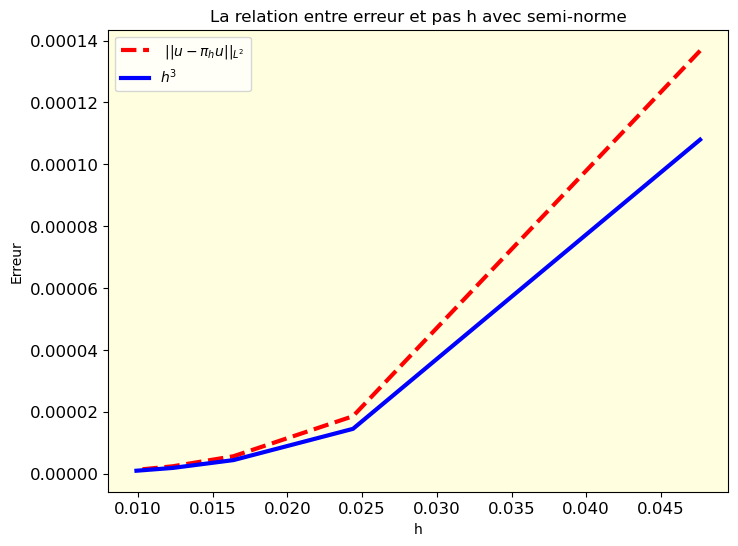

In [31]:
image_erreur_l2(L,M,eps)

In [39]:
def image_erreur_l2_loglog(L,M,eps):
    
    fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi = 100)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_facecolor('lightyellow')
    Y_erreur = []
    Y_h3 = []
    X_h=[]
    for m in M:
        X=np.linspace(0,L,2*m+3)
        err=erreur_norme2(m,u,eps)
        Y_erreur.append(err)
        Y_h3.append(L/(m+1)**3)
        X_h.append(L/(m+1))
        
    log_X_h = np.log10(X_h)
    log_Y_erreur = np.log10(Y_erreur)
    log_Y_h3 = np.log10(Y_h3)
    
    pente_Y_erreur = stats.linregress(log_X_h, log_Y_erreur)[0]
    pente_Y_erreur = np.round(pente_Y_erreur, 2)
    pente_Y_h3 = stats.linregress(log_X_h, log_Y_h3)[0]
    pente_Y__h3 = np.round(pente_Y_h3, 2)
            
    
    plt.loglog(X_h,Y_erreur, '--', label = " log($||u - \pi_h u||_{L^2}$) avec la pente k =" +str(pente_Y_erreur), color = "red", linewidth=3)
    plt.loglog(X_h,Y_h3, label = "log($h^3$) avec la pente k =" +str(pente_Y_h3), color = 'blue', linewidth=3)
    plt.title("La relation entre erreur et pas h avec semi-norme loglog")
    plt.legend()
    plt.xlabel("log(h)")
    plt.ylabel("Erreur")
    plt.show()

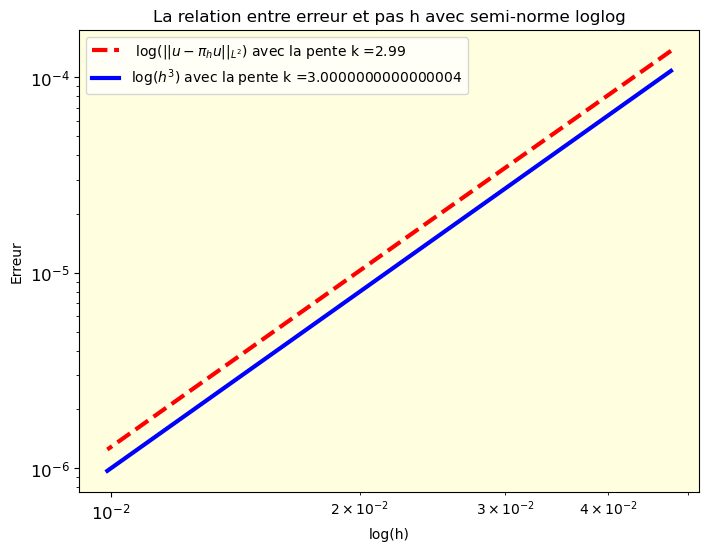

In [40]:
image_erreur_l2_loglog(L,M,eps)

In [23]:
def base_wi_prime(x, h, i):
    return (4*x - 4*i*h - 3*h)/h**2

def base_wi_demi_prime(x, h, i):
    return (-8*x + 8*i*h + 4*h)/h**2

def base_wi_1_prime(x, h, i):
    return (4*x - 4*i*h - h)/h**2

In [24]:
def erreur_prime(x,xi,xi_1,ui,ui_demi,ui_1):
    h = xi_1 - xi
    i = xi/h
    return (u_prime(x,eps)-(ui*base_wi_prime(x,h,i) + ui_demi*base_wi_demi_prime(x,h,i)+ui_1*base_wi_1_prime(x,h,i)+(beta-alpha)))**2

In [25]:
def erreur_norme_semi(m, u, eps):
    h = L/(m+1)
    erreur_semi = 0
    Uh = globale_numérique(m,eps)
    for i in range(0,m+1):
        xi = i*h
        xi_1 = (i+1)*h
        Ui = Uh[2*i]
        Ui_1 = Uh[2*i+2]
        Ui_demi = Uh[2*i+1]
        erreur_Ti = integ.quad(lambda x:(erreur_prime(x,xi,xi_1,Ui,Ui_demi,Ui_1)),xi,xi_1)[0]
        erreur_semi += erreur_Ti
    return np.sqrt(erreur_semi)

In [41]:
def image_erreur_semi(L,M,eps):
    fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi = 100)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_facecolor('lightyellow')
    Y_erreur = []
    Y_h2 = []
    X_h=[]
    for m in M:
        X=np.linspace(0,L,2*m+3)
        erreur=erreur_norme_semi(m,u,eps)
        Y_erreur.append(erreur)
        Y_h2.append(L/(m+1)**2)
        X_h.append(L/(m+1))
    plt.plot(X_h, Y_erreur, '--', label="$||u'-\pi_h u'||_{L^2}$ ", color = "red", linewidth=3)
    plt.plot(X_h, Y_h2, label="$h^2$", color = 'blue', linewidth=3)
    plt.title("La relation entre erreur et pas h avec semi-norme")
    plt.legend()
    plt.xlabel("h")
    plt.ylabel("Erreur")
    plt.show()

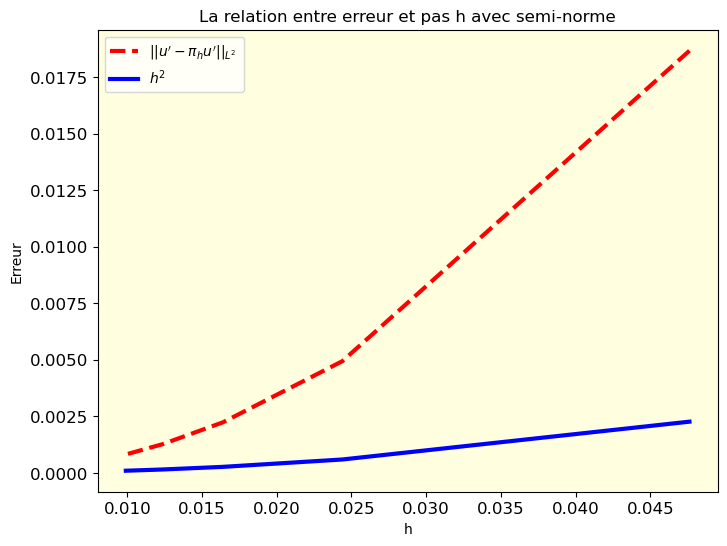

In [42]:
image_erreur_semi(L,M,eps)

In [50]:
def image_erreur_semi_loglog(L,M,eps):
    fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi = 100)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_facecolor('lightyellow')
    Y_erreur = []
    Y_h2 = []
    X_h=[]
    
    for m in M:
        X=np.linspace(0,L,2*m+3)
        erreur=erreur_norme_semi(m,u,eps)
        Y_erreur.append(erreur)
        Y_h2.append(L/(m+1)**2)
        X_h.append(L/(m+1))
        
    log_X_h = np.log10(X_h)
    log_Y_erreur = np.log10(Y_erreur)
    log_Y_h2 = np.log10(Y_h2)
    
    pente_Y_erreur = stats.linregress(log_X_h, log_Y_erreur)[0]
    pente_Y_erreur = np.round(pente_Y_erreur, 2)
    pente_Y_h2 = stats.linregress(log_X_h, log_Y_h2)[0]
    pente_Y_h2 = np.round(pente_Y_h2, 2)
    
    plt.loglog(X_h, Y_erreur, '--', 
               label="log d'erreur pour la semi-norme avec la pente k =" +str(pente_Y_erreur), color = "red", linewidth=3)
    plt.loglog(X_h, Y_h2, label="log($h^2$) avec k =" +str(pente_Y_h2), color = 'blue', linewidth=3)
    plt.title("La relation entre erreur et pas h avec semi-norme loglog")
    plt.legend()
    plt.xlabel("h")
    plt.ylabel("Erreur")
    plt.show()

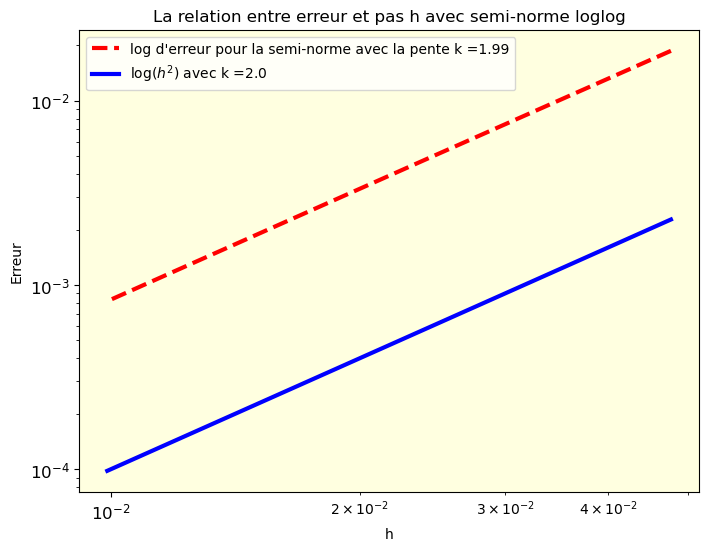

In [51]:
image_erreur_semi_loglog(L,M,eps)